In [1]:
#pip install tensorflow-gpu

In [2]:
#import sys
#print(sys.version)

In [3]:
#pip install pandas


In [4]:
#!pip install matplotlib

In [5]:
#!pip install sklearn

In [6]:
#!pip install imutils

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.applications.nasnet import preprocess_input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from imutils import paths
import os

In [8]:
#if not tf.test.gpu_device_name():
#    print("No Gpu")   

In [9]:
#from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())

In [10]:
LR = 1e-4
BS = 32
EP = 10

In [11]:
labels = []
data = [] 
labels3 = []
data3 = [] 


In [12]:
DIR = r"dataset"
CAT = ['mask_off', 'mask_on']

In [13]:
print("Loading Images")
for cat in CAT:
    path = os.path.join(DIR,cat)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        
        image = img_to_array(image)
        image = preprocess_input(image)

        data.append(image)
        labels.append(cat)

print("Images loaded")

Loading Images


C:\Users\Mehul\anaconda3\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Images loaded


In [14]:
#For inceptionV3
print("Loading Images")
for cat in CAT:
    path = os.path.join(DIR,cat)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(299,299))
        
        image = img_to_array(image)
        image = preprocess_input(image)

        data3.append(image)
        labels3.append(cat)
print("Images loaded")

Loading Images
Images loaded


In [15]:
#One hot encoding labels
lb = LabelBinarizer()

labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

In [ ]:
#One hot encoding labels
lb = LabelBinarizer()

labels3 = lb.fit_transform(labels3)
labels3 = to_categorical(labels3)

data3 = np.array(data3, dtype="float32")
labels3 = np.array(labels3)

In [ ]:
(trainX1, testX1, trainY1, testY1) = train_test_split(data,
                                                  labels,
                                                  test_size=0.20,
                                                  stratify=labels,
                                                  random_state=42)

In [ ]:
(trainX2, testX2, trainY2, testY2) = train_test_split(data,
                                                  labels,
                                                  test_size=0.20,
                                                  stratify=labels,
                                                  random_state=42)

In [ ]:
(trainX3, testX3, trainY3, testY3) = train_test_split(data3,
                                                  labels3,
                                                  test_size=0.20,
                                                  stratify=labels3,
                                                  random_state=42)

In [ ]:
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [ ]:
import tensorflow as tf
from tensorflow import keras
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=0, verbose=1, mode='auto',
    baseline=None, restore_best_weights=False
)

# NASNetMobile

In [ ]:
#load into NASNetMobile
baseModel1 = NASNetMobile(weights="imagenet", 
                        include_top=False,
                        input_tensor=Input(shape=(224, 224, 3)))

In [ ]:
#NASNetMobile Model

myModel1 = baseModel1.output

myModel1 = AveragePooling2D(pool_size=(7, 7))(myModel1)
myModel1 = Flatten(name="flatten")(myModel1)
myModel1 = Dense(128, activation="relu")(myModel1)

myModel1 = Dense(128, activation="relu")(myModel1)

myModel1 = Dropout(0.5)(myModel1)


myModel1 = Dense(2, activation="softmax")(myModel1)


NASNetmodel = Model(inputs=baseModel1.input, outputs=myModel1)

for layer in baseModel1.layers:
    layer.trainable = False

In [26]:
opt = Adam(lr=LR, decay=LR/EP)
NASNetmodel.compile(loss="binary_crossentropy", 
              optimizer=opt,
              metrics=["accuracy"])

In [27]:
hist1 = NASNetmodel.fit(
    aug.flow(trainX1, trainY1, batch_size=BS),
    steps_per_epoch=len(trainX1) // BS,
    validation_data=(testX1, testY1),
    validation_steps=len(testX1) // BS,
    epochs=EP,)

Epoch 1/10
95/95 [==============================] - 415s 4s/step - loss: 0.5515 - accuracy: 0.7445 - val_loss: 0.1694 - val_accuracy: 0.9609
Epoch 2/10
95/95 [==============================] - 107s 1s/step - loss: 0.1774 - accuracy: 0.9534 - val_loss: 0.0852 - val_accuracy: 0.9687
Epoch 3/10
95/95 [==============================] - 106s 1s/step - loss: 0.0987 - accuracy: 0.9698 - val_loss: 0.0618 - val_accuracy: 0.9765
Epoch 4/10
95/95 [==============================] - 106s 1s/step - loss: 0.0688 - accuracy: 0.9822 - val_loss: 0.0516 - val_accuracy: 0.9804
Epoch 5/10
95/95 [==============================] - 106s 1s/step - loss: 0.0535 - accuracy: 0.9862 - val_loss: 0.0426 - val_accuracy: 0.9844
Epoch 6/10
95/95 [==============================] - 105s 1s/step - loss: 0.0597 - accuracy: 0.9790 - val_loss: 0.0380 - val_accuracy: 0.9870
Epoch 7/10
95/95 [==============================] - 106s 1s/step - loss: 0.0503 - accuracy: 0.9831 - val_loss: 0.0333 - val_accuracy: 0.9896
Epoch 8/10
95

# InceptionV3

In [28]:
#load into InceptionV3

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
baseModel3 = InceptionV3(weights="imagenet", 
                        include_top=False,
                        input_tensor=Input(shape=(299,299, 3)))

In [29]:
#InceptionV3 Model

myModel3 = baseModel3.output

myModel3 = AveragePooling2D(pool_size=(7, 7))(myModel3)
myModel3 = Flatten(name="flatten")(myModel3)
myModel3 = Dense(128, activation="relu")(myModel3)

myModel3 = Dense(128, activation="relu")(myModel3)

myModel3 = Dropout(0.5)(myModel3)


myModel3 = Dense(2, activation="softmax")(myModel3)


Inceptionmodel = Model(inputs=baseModel3.input, outputs=myModel3)

for layer in baseModel3.layers:
    layer.trainable = False

In [30]:
opt = Adam(lr=LR, decay=LR/EP)
Inceptionmodel.compile(loss="binary_crossentropy", 
              optimizer=opt,
              metrics=["accuracy"])

In [31]:
hist3 = Inceptionmodel.fit(
    aug.flow(trainX3, trainY3, batch_size=BS),
    steps_per_epoch=len(trainX3) // BS,
    validation_data=(testX3, testY3),
    validation_steps=len(testX3) // BS,
    epochs=EP,)

Epoch 1/10
95/95 [==============================] - 411s 4s/step - loss: 0.4630 - accuracy: 0.8117 - val_loss: 0.0795 - val_accuracy: 0.9831
Epoch 2/10
95/95 [==============================] - 231s 2s/step - loss: 0.0929 - accuracy: 0.9810 - val_loss: 0.0373 - val_accuracy: 0.9896
Epoch 3/10
95/95 [==============================] - 165s 2s/step - loss: 0.0656 - accuracy: 0.9845 - val_loss: 0.0288 - val_accuracy: 0.9935
Epoch 4/10
95/95 [==============================] - 176s 2s/step - loss: 0.0402 - accuracy: 0.9896 - val_loss: 0.0271 - val_accuracy: 0.9909
Epoch 5/10
95/95 [==============================] - 174s 2s/step - loss: 0.0412 - accuracy: 0.9891 - val_loss: 0.0224 - val_accuracy: 0.9935
Epoch 6/10
95/95 [==============================] - 169s 2s/step - loss: 0.0202 - accuracy: 0.9971 - val_loss: 0.0211 - val_accuracy: 0.9948
Epoch 7/10
95/95 [==============================] - 170s 2s/step - loss: 0.0297 - accuracy: 0.9900 - val_loss: 0.0207 - val_accuracy: 0.9948
Epoch 8/10
95

# MobileNetV2

In [32]:
#load into MobileNetV2

baseModel2 = MobileNetV2(weights="imagenet", 
                        include_top=False,
                        input_tensor=Input(shape=(224, 224, 3)))

In [33]:
#MobileNetV2 Model

myModel2 = baseModel2.output

myModel2 = AveragePooling2D(pool_size=(7, 7))(myModel2)
myModel2 = Flatten(name="flatten")(myModel2)
myModel2 = Dense(128, activation="relu")(myModel2)

myModel2 = Dense(128, activation="relu")(myModel2)

myModel2 = Dropout(0.5)(myModel2)


myModel2 = Dense(2, activation="softmax")(myModel2)


MobileNetmodel = Model(inputs=baseModel2.input, outputs=myModel2)

for layer in baseModel2.layers:
    layer.trainable = False

In [34]:
opt = Adam(lr=LR, decay=LR/EP)
MobileNetmodel.compile(loss="binary_crossentropy", 
              optimizer=opt,
              metrics=["accuracy"])

In [35]:
hist2 = MobileNetmodel.fit(
    aug.flow(trainX2, trainY2, batch_size=BS),
    steps_per_epoch=len(trainX2) // BS,
    validation_data=(testX2, testY2),
    validation_steps=len(testX2) // BS,
    epochs=EP,)

Epoch 1/10
95/95 [==============================] - 333s 3s/step - loss: 0.5580 - accuracy: 0.7671 - val_loss: 0.1568 - val_accuracy: 0.9765
Epoch 2/10
95/95 [==============================] - 82s 860ms/step - loss: 0.1577 - accuracy: 0.9675 - val_loss: 0.0619 - val_accuracy: 0.9909
Epoch 3/10
95/95 [==============================] - 75s 785ms/step - loss: 0.0789 - accuracy: 0.9815 - val_loss: 0.0418 - val_accuracy: 0.9909
Epoch 4/10
95/95 [==============================] - 85s 894ms/step - loss: 0.0652 - accuracy: 0.9780 - val_loss: 0.0355 - val_accuracy: 0.9909
Epoch 5/10
95/95 [==============================] - 88s 921ms/step - loss: 0.0434 - accuracy: 0.9901 - val_loss: 0.0302 - val_accuracy: 0.9922
Epoch 6/10
95/95 [==============================] - 87s 909ms/step - loss: 0.0438 - accuracy: 0.9879 - val_loss: 0.0277 - val_accuracy: 0.9922
Epoch 7/10
95/95 [==============================] - 80s 837ms/step - loss: 0.0422 - accuracy: 0.9867 - val_loss: 0.0316 - val_accuracy: 0.9896
E

In [36]:
#model.metrics_names

# NASNet Evaluation


              precision    recall  f1-score   support

    mask_off       0.99      0.99      0.99       384
     mask_on       0.99      0.99      0.99       383

    accuracy                           0.99       767
   macro avg       0.99      0.99      0.99       767
weighted avg       0.99      0.99      0.99       767



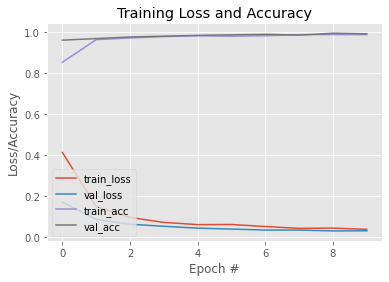

In [38]:
#Eval
predIdxs = NASNetmodel.predict(testX1, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY1.argmax(axis=1), predIdxs,target_names=lb.classes_))

# serialize the model to disk
NASNetmodel.save("mask_detector_NASNet.model", save_format="h5")

# plot the training loss and accuracy
N = EP
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), hist1.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist1.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), hist1.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), hist1.history["val_accuracy"], label="val_acc")


plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("NASNetMobile-plot.png")

# Inception Evaluation

              precision    recall  f1-score   support

    mask_off       0.99      0.99      0.99       384
     mask_on       0.99      0.99      0.99       383

    accuracy                           0.99       767
   macro avg       0.99      0.99      0.99       767
weighted avg       0.99      0.99      0.99       767



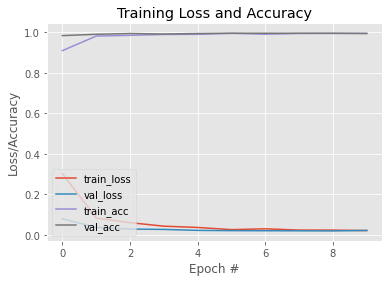

In [39]:
#Eval
predIdxs = Inceptionmodel.predict(testX3, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY3.argmax(axis=1), predIdxs,target_names=lb.classes_))

# serialize the model to disk
Inceptionmodel.save("mask_detector_InceptionV3.model", save_format="h5")

# plot the training loss and accuracy
N = EP
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), hist3.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist3.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), hist3.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), hist3.history["val_accuracy"], label="val_acc")


plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("Inception-plot.png")

# MobileNet Evaluation


              precision    recall  f1-score   support

    mask_off       1.00      0.99      0.99       384
     mask_on       0.99      1.00      0.99       383

    accuracy                           0.99       767
   macro avg       0.99      0.99      0.99       767
weighted avg       0.99      0.99      0.99       767



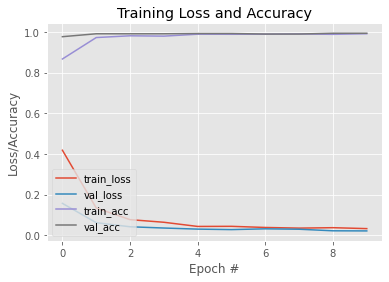

In [40]:
#Eval
predIdxs = MobileNetmodel.predict(testX2, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY2.argmax(axis=1), predIdxs,target_names=lb.classes_))

# serialize the model to disk
MobileNetmodel.save("mask_detector_MobileNetV2.model", save_format="h5")

# plot the training loss and accuracy
N = EP
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), hist2.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist2.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), hist2.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), hist2.history["val_accuracy"], label="val_acc")


plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("MobileNetV2-plot.png")

In [ ]:

from tensorflow.keras.models import load_model
from imutils.video import VideoStream
import numpy as np
import imutils
import time
import cv2
import os

def detect_predict(frame, faceNet, maskNet):
	# Get dimension and create blob
	
	(h, w) = frame.shape[:2]
	blob = cv2.dnn.blobFromImage(frame, 1.0, (299, 299),
		(104.0, 177.0, 123.0))

	# pass the blob through the network and obtain the face detections
	faceNet.setInput(blob)
	detections = faceNet.forward()
	print(detections.shape)

	# initialize our list of faces, their corresponding locations,
	# and the list of predictions from our face mask network
	faces = []
	locs = []
	preds = []

	# loop over the detections
	for i in range(0, detections.shape[2]):
		# extract the confidence (i.e., probability) associated with
		# the detection
		confidence = detections[0, 0, i, 2]

		# filter out weak detections by ensuring the confidence is
		# greater than the minimum confidence
		if confidence > 0.5:
			# compute the (x, y)-coordinates of the bounding box for
			# the object
			box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
			(startX, startY, endX, endY) = box.astype("int")

			# ensure the bounding boxes fall within the dimensions of
			# the frame
			(startX, startY) = (max(0, startX), max(0, startY))
			(endX, endY) = (min(w - 1, endX), min(h - 1, endY))

			# extract the face ROI, convert it from BGR to RGB channel
			# ordering, resize it to 224x224, and preprocess it
			face = frame[startY:endY, startX:endX]
			face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
			face = cv2.resize(face, (299, 299))
			face = img_to_array(face)
			face = preprocess_input(face)

			# add the face and bounding boxes to their respective
			# lists
			faces.append(face)
			locs.append((startX, startY, endX, endY))

	# only make a predictions if at least one face was detected
	if len(faces) > 0:
		# for faster inference we'll make batch predictions on *all*
		# faces at the same time rather than one-by-one predictions
		# in the above `for` loop
		faces = np.array(faces, dtype="float32")
		preds = maskNet.predict(faces, batch_size=32)

	# return a 2-tuple of the face locations and their corresponding
	# locations
	return (locs, preds)
prototxtPath = r"detect_face\deploy.prototxt"
weightsPath = r"detect_face\res10_300x300_ssd_iter_140000.caffemodel"
faceNet = cv2.dnn.readNet(prototxtPath, weightsPath)

maskNet = load_model('D:\College\Sem 4\Btp Project\MaskDetection-master\mask_detector_InceptionV3.model')

cap = VideoStream().start()

while True:
    frame = cap.read()
    frame = imutils.resize(frame,width=600,height=800)

        #Pass to detector model to  id face and check mask
    (locs, preds) = detect_predict(frame,faceNet,maskNet)
    for (box, pred) in zip(locs, preds):
		# unpack the bounding box and predictions
        (startX, startY, endX, endY)= box
        print("Mask ",pred[0])
        (withoutMask,mask) = pred

		# determine the class label and color we'll use to draw
        label = "No Mask" if withoutMask > mask else "Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

        # include the probability in the label
        label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

        # display the label and bounding box rectangle on the output
        cv2.putText(frame, label, (startX, startY - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
        cv2.rectangle(frame, (startX, startY), (endX, endY), color, 2)

    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF

    if key == ord("q"):
        break
cv2.destroyAllWindows()
cap.stop()

(1, 1, 200, 7)
Mask  0.999998
(1, 1, 200, 7)
Mask  0.99956626
(1, 1, 200, 7)
Mask  0.9999925
(1, 1, 200, 7)
Mask  0.99999785
(1, 1, 200, 7)
Mask  0.9999999
(1, 1, 200, 7)
Mask  0.99999976
(1, 1, 200, 7)
Mask  0.99999976
(1, 1, 200, 7)
Mask  0.99999976
(1, 1, 200, 7)
Mask  1.0
(1, 1, 200, 7)
Mask  1.0
(1, 1, 200, 7)
Mask  1.0
(1, 1, 200, 7)
Mask  1.0
(1, 1, 200, 7)
Mask  1.0
(1, 1, 200, 7)
Mask  1.0
(1, 1, 200, 7)
Mask  1.0
(1, 1, 200, 7)
Mask  1.0
(1, 1, 200, 7)
Mask  1.0
(1, 1, 200, 7)
Mask  0.9999999
(1, 1, 200, 7)
Mask  0.9999999
(1, 1, 200, 7)
Mask  1.0
(1, 1, 200, 7)
Mask  1.0
(1, 1, 200, 7)
Mask  1.0
(1, 1, 200, 7)
Mask  0.9999999
(1, 1, 200, 7)
Mask  1.0
(1, 1, 200, 7)
Mask  1.0
(1, 1, 200, 7)
Mask  1.0
(1, 1, 200, 7)
Mask  1.0
(1, 1, 200, 7)
Mask  1.0
(1, 1, 200, 7)
Mask  1.0
(1, 1, 200, 7)
Mask  1.0
(1, 1, 200, 7)
Mask  1.0
(1, 1, 200, 7)
Mask  1.0
(1, 1, 200, 7)
Mask  1.0
(1, 1, 200, 7)
Mask  1.0
(1, 1, 200, 7)
Mask  0.9999999
(1, 1, 200, 7)
Mask  1.0
(1, 1, 200, 7)
Mask  0.9